## 11주차: Computer Vision과 안면인식

컴퓨터 비전이 가장 많이 사용되는 분야

1) OCR(Optical Character Recognition)  

원래는 Optical Character Reader란 이름으로도 많이 제품화 되기도 하고 
상용화되어 있는 그런 기술입니다. ( 컴퓨터가 글자를 읽는 것.)

2) Face Detection

사람의 앞면을 인식하는 것

3) Smile Detection

 사람이 얼마나 웃고 있는가 입꼬리를 판독하는 서비스
 
4) Object Detection

 어떤 객체들을 바로 파악을 할 때 사용  ex) 자율주행 자동차

=> 마이크로소프트에서 제공하고 있는 Cognitive
Services를 사용할 때 몇 가지 주의사항들

1) 지원하는 이미지의 포맷은 jpg,png,gif,bmp 형태로 제공해 돼야 된다.
bmp는 워낙 이미지 사이즈가 커지기 때문에 요즘에 잘 사용되지 않고 있지만
워낙 기본적인 포맷이기 때문에 지원이 되고 있는 것을 보실 수가 있구요

2) 다음에 이미지의 사이즈는 4MB 보다 작아야 됩니다.

3) 이미지 크기는 50 by 50 보다 커야 된다는 거죠
이미지가 너무 작게 되면 분석 자체가 불가능하기 때문에 최소 사이즈를 지정을 해 놓고 있는 상태입니다

4) 제일 긴 이미지 같은 경우에는 50곱하기 50 에서 10000곱하기 10000픽셀 안에 들어야 되는데 우리가 알고 있는 대부분의 이미지는 이 안에 들기 때문에 사용하는데 크게 문제 없이 바로 사용을 하실 수 있을 것 같습니다

=> Vision의 몇 가지 기능

1)컨텐츠 태그 : 면 사진을 딱 찍으면 여기 어떤 요소들이 있는지 바로 태깅을 막 해 준다. 그리고 각 태그마다 정확도가 따로 매겨집니다

2) 개체 서치 : object detection 각각의 object들이 이 사진의 어디에 있는지 이런 것들을 찾아 내 주는 게 개체 검색 기능입니다

3) 브랜드 검색 : 경우에는 유명한 브랜드의 어떤 마크들을 자동으로 인식을 해 줍니다

4) 이미지 분류 : 자동분류

5) 이미지 설명 : 사진을 보여 줬을 때 그 안에 있는 요소들을 태깅을 해보고 한 줄로 설명을 해주는 거죠

6) 얼굴 감지 : 감지된 얼굴 각각에 대한 정보 Computer Vision은 감지된 얼굴 각각에 대한 좌표, 사각형, 성별 및 나이 반환

7) 이미지 유형 감지 :  이미지가 선 그리기인지, 아니면 이미지가 클립 아트인지 여부와 같은 이미지에 대한 특성 감지

8) 도메인 특정 콘텐츠 감지 : 유명인 및 랜드마크와 같은 관련 콘텐츠를 감지하고 식별

9) 색 구성표 감지 : 이미지 내의 색 사용을 분석

10) 썸네일 생성 : 이미지의 콘텐츠를 분석하여 해당 이미지에 대한 적절한 썸네일 생성

11) 관심 영역 가져오기 : 이미지의 콘텐츠를 분석하여 '관심 영역'의 좌표를 반환한다. 

우리가 파이썬에서 이 서비스를 사용할 때 두가지 방식으로 접근이 가능

1) 웹 API 형태로 호출해서 사용하는 것

2) 각각의 랭귀지에 맞춰서 제공되고 있는 라이브러리들

라이브러리 불러옴 -> 그 서비스의 키 필요 -> Subscription Key ->   
호출할 서비스의 주소 확인 -> 파라메타를 넣어서 통신을 하기 위한 헤더 정보를 세팅 -> 
헤더 정보를 가지고 바로 해당되는 주소에 있는 서비스를 바로 호출 ->  
호출하면 자기가 막 돌아서 분석 -> 분석된 결과를 바로 이렇게 JSON으로 리턴 


JSON : 데이터의 하나의 형태 / JavaScript Object Notation /  
       Key값과 Value로 이루어진 이런 형태
       
이렇게 JSON 형태를 주로 많이 사용하는 이유는 기본적으로 가볍기 때문에 그렇습니다
그래서 가볍기 때문에 쉽게 쓸 수 있고요 그리고 네트워크를 통해서 빠르게 전송이 될 수가 있습니다

### 컨텐츠 태그 기법을 어떻게 사용하는지

## 컨텐츠 테그 (Contents Tag)

In [1]:
import requests   # 네트워크 통신을 위해 사용

그다음에 이미지 처리에 필요한 몇 가지 라이브러리들을 불러옵니다.  

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

In [3]:
import json

Subscription Key와 접속에 필요한 URL을 설정한다

In [4]:
subscription_key = '6c01e632a4574f7287430b62514f6928'
assert subscription_key

In [5]:
vision_base_url = "https://kmooc--vision.cognitiveservices.azure.com/vision/v3.0/"

In [6]:
analyze_url = vision_base_url + "analyze"  # 컨텐츠를 태깅하는 API 주소가 된다.

분석에 사용되는 이미지를 확인한다.

In [7]:
image_url = "https://travelblog.expedia.co.kr/wp-content/uploads/2019/01/batch_29.jpg"

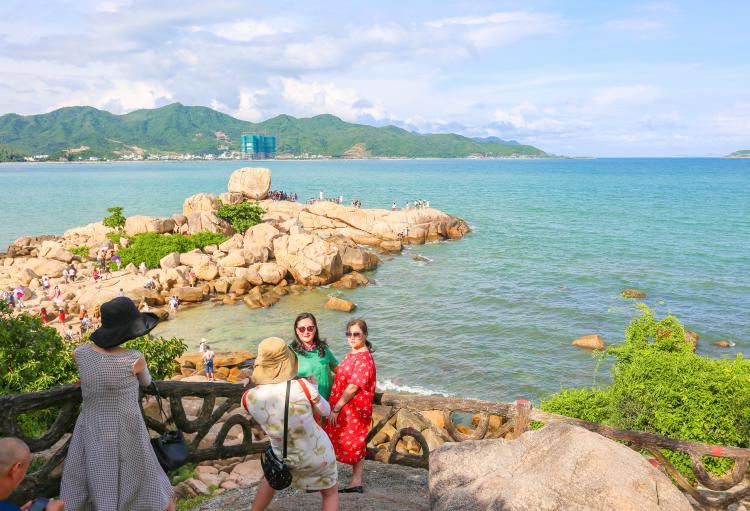

In [8]:
image = Image.open(BytesIO(requests.get(image_url).content))
image

헤더 정보를 셋팅한다.

In [9]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}  # header정보에서 가장 먼저 key값
params = {'visualFeatures': 'Categories,Description,Color'}  #분류,설명,색깔
data = {'url': image_url}

여기까지 하면 호출할 준비가 끝난다 이제 호출해보자

In [10]:
headers

{'Ocp-Apim-Subscription-Key': '6c01e632a4574f7287430b62514f6928'}

In [11]:
params

{'visualFeatures': 'Categories,Description,Color'}

In [12]:
data

{'url': 'https://travelblog.expedia.co.kr/wp-content/uploads/2019/01/batch_29.jpg'}

In [13]:
response = requests.post(analyze_url, headers = headers, params = params, json=data)
response.raise_for_status()

In [14]:
analysis = response.json()

분석 결과이다. 분석결과에는 랜드마크를 비롯해서 인지한 개체들과 문장으로 구성된 결과가 포함되어 있다.

In [15]:
analysis

{'categories': [{'name': 'outdoor_',
   'score': 0.00390625,
   'detail': {'landmarks': []}},
  {'name': 'outdoor_oceanbeach',
   'score': 0.84375,
   'detail': {'landmarks': []}}],
 'color': {'dominantColorForeground': 'Grey',
  'dominantColorBackground': 'White',
  'dominantColors': ['White', 'Grey'],
  'accentColor': '996D32',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['water',
   'outdoor',
   'nature',
   'mountain',
   'woman',
   'lake',
   'sitting',
   'boat',
   'body',
   'river',
   'people',
   'front',
   'ocean',
   'sea',
   'overlooking',
   'beach',
   'table',
   'food',
   'bench',
   'shore',
   'umbrella',
   'group',
   'pier',
   'man',
   'standing',
   'dock',
   'wooden',
   'rock',
   'bridge',
   'produce',
   'phone',
   'sheep',
   'parked',
   'docked'],
  'captions': [{'text': 'a group of people sitting in front of a body of water',
    'confidence': 0.9377130561458611}]},
 'requestId': '821e624e-f0cc-4c87-bd78-df2d8b167a54',
 'm

In [13]:
image_caption = analysis["description"]["captions"][0]["text"].capitalize()

NameError: name 'analysis' is not defined

In [17]:
image_caption

'A group of people sitting in front of a body of water'

## 객체 감지(Object Detection)

In [18]:
objectDection_url = vision_base_url + "detect"  
# detect가 붙은 건 이미지 안에 있는 내용들을 detect 하겠다 찾아내겠다라는 뜻

In [19]:
image_url = "https://static01.nyt.com/images/2016/05/21/universal/ko/21FarRight-Germany-korean/21FarRight-Germany-blog533.jpg"

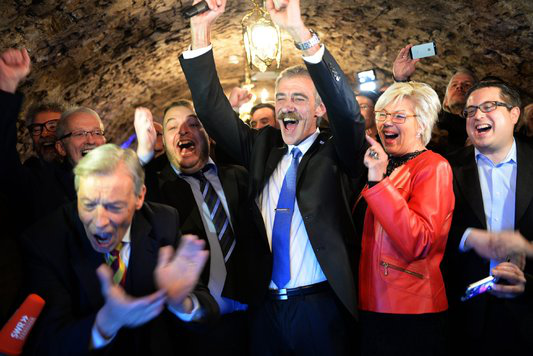

In [20]:
img = Image.open(BytesIO(requests.get(image_url).content))
img

In [21]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}  # header정보에서 가장 먼저 key값
params = {'visualFeatures': 'Categories,Description,Color'}  #분류,설명,색깔
data = {'url': image_url}

In [22]:
response = requests.post(objectDection_url, headers = headers, params = params, json=data)
response.raise_for_status()

In [23]:
dectionResult = response.json()

In [24]:
dectionResult

{'objects': [{'rectangle': {'x': 356, 'y': 74, 'w': 99, 'h': 272},
   'object': 'person',
   'confidence': 0.762},
  {'rectangle': {'x': 444, 'y': 72, 'w': 89, 'h': 269},
   'object': 'person',
   'confidence': 0.751},
  {'rectangle': {'x': 202, 'y': 10, 'w': 167, 'h': 342},
   'object': 'person',
   'confidence': 0.706},
  {'rectangle': {'x': 18, 'y': 148, 'w': 187, 'h': 206},
   'object': 'person',
   'confidence': 0.783}],
 'requestId': '116f7482-d631-4c2a-ae5c-b89848d609fd',
 'metadata': {'height': 356, 'width': 533, 'format': 'Jpeg'}}

이걸 좀 더 보기 좋게 하기 위해서는 각각 객체에 우리가 사각형 영역을 아니까
그리다가 빨간색테두리 로 입혀보고 거기에다가 captions을 한번 넣어 보도록 할게요

In [25]:
from PIL import Image, ImageDraw, ImageFont

사각형을 그리기 위해서 ImageDraw / 글자를 세기기 위해서 ImageFont

In [26]:
draw = ImageDraw.Draw(img)

In [27]:
def CreatImage(dectionResult):
    
    objects = dectionResult['objects']
    
    for obj in objects:
        print(obj)
        
        rect = obj['rectangle']
        x = rect['x']
        y = rect['y']
        w = rect['w']
        h = rect['h']
        
        draw.rectangle(((x,y), (x+w, y+h)), outline='red')
        
        #Font locaqtion
        fontX = x-18
        fontY = y
        
        objectName = obj['object']
        draw.text((fontX, fontY), objectName, fill='red')

In [28]:
CreatImage(dectionResult)

{'rectangle': {'x': 356, 'y': 74, 'w': 99, 'h': 272}, 'object': 'person', 'confidence': 0.762}
{'rectangle': {'x': 444, 'y': 72, 'w': 89, 'h': 269}, 'object': 'person', 'confidence': 0.751}
{'rectangle': {'x': 202, 'y': 10, 'w': 167, 'h': 342}, 'object': 'person', 'confidence': 0.706}
{'rectangle': {'x': 18, 'y': 148, 'w': 187, 'h': 206}, 'object': 'person', 'confidence': 0.783}


In [29]:
img.show()

지금 몇 줄 안 썼는데 바로 여기까지 결과가 낼 수 있었던 이유는 일단은 cognitive service가 웬만한 걸 다 만들어 놨기 때문에 굉장히 편하게 사용을 할 수가 있습니다